In [ ]:
# requirements/dependancies 
# matplotlib== 3.9.0
# numpy== 2.0.0
# pandas ==  2.2.2
# seaborn == 0.13.2


In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv(r"C:\Users\nisha\Desktop\even_assign\data_science_task_dataset.csv")

#  EDA 

In [3]:
data.head(10)

,Unnamed: 0,signup_time,ages,genders,plans,plan_months,payment_time,is_early_bird,payment_amount
0,13,2022-01-01 00:05:27,45,FEMALE,PLUS,12,NaN,False,0
1,56,2022-01-01 00:06:44,42,MALE,PLUS,12,NaN,False,0
2,59,2022-01-01 00:17:55,52,MALE,PLUS,12,NaN,False,0
3,61,2022-01-01 00:20:45,48,MALE,PLUS,12,NaN,False,0
4,84,2022-01-01 00:27:36,61,MALE,LITE,12,NaN,False,0
5,71,2022-01-01 00:30:20,52,MALE,PLUS,3,NaN,False,0
6,30,2022-01-01 00:36:45,32,MALE,PLUS,12,NaN,False,0
7,19,2022-01-01 01:00:05,"32, 40, 41","MALE, MALE, MALE","PLUS, PLUS, PLUS",3,NaN,False,0
8,24,2022-01-01 01:18:33,30,FEMALE,PLUS,12,NaN,False,0
9,8,2022-01-01 01:51:53,"57, 44, 36","MALE, MALE, FEMALE","PLUS, PLUS, PLUS",12,NaN,False,0


In [4]:
data.shape
# 232319,9

(232319, 9)

In [5]:
# all the entries in the first column are uinque ,can consider them as IDs 
data.iloc[:,0].unique().shape
#232319

(232319,)

In [6]:
data.dtypes

Unnamed: 0         int64
signup_time       object
ages              object
genders           object
plans             object
plan_months        int64
payment_time      object
is_early_bird       bool
payment_amount     int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232319 entries, 0 to 232318
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      232319 non-null  int64 
 1   signup_time     232319 non-null  object
 2   ages            232319 non-null  object
 3   genders         232319 non-null  object
 4   plans           232319 non-null  object
 5   plan_months     232319 non-null  int64 
 6   payment_time    43338 non-null   object
 7   is_early_bird   232319 non-null  bool  
 8   payment_amount  232319 non-null  int64 
dtypes: bool(1), int64(3), object(5)
memory usage: 14.4+ MB


In [8]:
data['signup_time'] = pd.to_datetime(data['signup_time'])
# converting the object datatype to date-time to split b/w data and time to understand if the year is same on all columns

data['payment_time'] = pd.to_datetime(data['payment_time'])

In [9]:
data['signup_date'] = data['signup_time'].dt.date
data['signup_only_time'] = data['signup_time'].dt.time

In [10]:
data['signup_date'].unique()


# not only one date so there might be people , another metric can be on which date did most people sign up , time-series of signup


# the data suggest dates from 2022-1-1 to 2022-7-31



array([datetime.date(2022, 1, 1), datetime.date(2022, 1, 2),
       datetime.date(2022, 1, 3), datetime.date(2022, 1, 4),
       datetime.date(2022, 1, 5), datetime.date(2022, 1, 6),
       datetime.date(2022, 1, 7), datetime.date(2022, 1, 8),
       datetime.date(2022, 1, 9), datetime.date(2022, 1, 10),
       datetime.date(2022, 1, 11), datetime.date(2022, 1, 12),
       datetime.date(2022, 1, 13), datetime.date(2022, 1, 14),
       datetime.date(2022, 1, 15), datetime.date(2022, 1, 16),
       datetime.date(2022, 1, 17), datetime.date(2022, 1, 18),
       datetime.date(2022, 1, 19), datetime.date(2022, 1, 20),
       datetime.date(2022, 1, 21), datetime.date(2022, 1, 22),
       datetime.date(2022, 1, 23), datetime.date(2022, 1, 24),
       datetime.date(2022, 1, 25), datetime.date(2022, 1, 26),
       datetime.date(2022, 1, 27), datetime.date(2022, 1, 28),
       datetime.date(2022, 1, 29), datetime.date(2022, 1, 30),
       datetime.date(2022, 1, 31), datetime.date(2022, 2, 1),
  

In [11]:
data['signup_only_time'].unique().shape

# 232319 - 80393 = 151926 
# this can be considered as the number of famlies that signuped 
# we can be more precise and find out exactly how many were group signups vs individual 


(80393,)

In [12]:
# we can be more precise and find out exactly how many were group signups vs individual

# we can be more precise and find out exactly how many were group signups vs individual 

group_signups = 0 
individual_signups = 0 
for i , row in data.iterrows():
    if ',' in row['ages'] or ',' in row['genders'] or ',' in row['plans']:
        group_signups += 1
    else:
        individual_signups +=1

print(f"Group signups : {group_signups}")
print(f"Individual signups : {individual_signups}")

Group signups : 73473
Individual signups : 158846


In [13]:
158846 +73473 

232319

In [14]:
# before splitting understanding if all the cells with multiple entries have the same number of multiple entries 

df1 = data[['ages','genders','plans']]

df1.iloc[9]

ages               57, 44, 36
genders    MALE, MALE, FEMALE
plans        PLUS, PLUS, PLUS
Name: 9, dtype: object

In [15]:
data['plan_months'].unique()

array([12,  3,  6])

In [16]:
# checking if all the multiple cells have the same amount of entries

for index , row in df1.iterrows():

    ages = row['ages'].split(',')
    genders = row['genders'].split(',')
    plans = row['plans'].split(',')

    if len(ages) == len(genders) == len(plans):
        continue
    else:
        print(f"False at the row {index}")


In [18]:
# expanding dataframe
# the problem is the payment_amount , best guess is to split it among the individuals. But that is not how the price probably goes. 
# Given that the group has the same plan_months , but different plan, we can divide the payment based on plan 

""" : 
I though of making a function that gets the individual payment_amounts through the ration of plans, but
after doing some maths and testing it just comes 
down to (payment_amount)/total_counts everytime because we do not know the underlying price difference b/w PLUS and LITE plans. 

"""
def divide_payment_amount(row):
    if row['payment_amount'] > 0 and (',' in row['ages'] or ',' in row['genders'] or ',' in row['plans']):
        # splitting the data 
        plans = row['plans'].split(', ')
        plan_counts = pd.Series(plans).value_counts()

        # calculating individual payments
        individual_payments = row['payment_amount'] / plan_counts.sum()
        return [individual_payments] * len(plans)
    else:
        
        return [row['payment_amount']]
    
""" the funtinon that claculates the ration of plans to come-up with individual_payments. 

def divide_payment_amount(row):
    if row['payment_amount'] > 0 and (',' in row['ages'] or ',' in row['genders'] or ',' in row['plans']):
        # splitting the plans data 
        plans = row['plans'].split(', ')
        plan_counts = pd.Series(plans).value_counts().to_dict()
        print(plan_counts)
        #  the total parts for the ratio
        total_parts = sum(plan_counts.values())
        print(total_parts)
        #  total payment amount
        total_payment = row['payment_amount']
        print(total_payment)
        # payment amount for each plan
        plan_payment_amounts = {plan: (count / total_parts) * total_payment for plan, count in plan_counts.items()}
        print(plan_payment_amounts)
        individual_payments = [plan_payment_amounts[plan] / plan_counts[plan] for plan in plans]
        print(individual_payments)
        return individual_payments
    else:
        # If no multiple entries, return the original payment amount as a single-element list
        return [row['payment_amount']]


"""



" the funtinon that claculates the ration of plans to come-up with individual_payments. \n\ndef divide_payment_amount(row):\n    if row['payment_amount'] > 0 and (',' in row['ages'] or ',' in row['genders'] or ',' in row['plans']):\n        # splitting the plans data \n        plans = row['plans'].split(', ')\n        plan_counts = pd.Series(plans).value_counts().to_dict()\n        print(plan_counts)\n        #  the total parts for the ratio\n        total_parts = sum(plan_counts.values())\n        print(total_parts)\n        #  total payment amount\n        total_payment = row['payment_amount']\n        print(total_payment)\n        # payment amount for each plan\n        plan_payment_amounts = {plan: (count / total_parts) * total_payment for plan, count in plan_counts.items()}\n        print(plan_payment_amounts)\n        individual_payments = [plan_payment_amounts[plan] / plan_counts[plan] for plan in plans]\n        print(individual_payments)\n        return individual_payments\n  

In [19]:
data['individual_payments'] = data.apply(divide_payment_amount, axis=1)


In [20]:
data["ID"] = data.iloc[:,0]
data.head()

,Unnamed: 0,signup_time,ages,genders,plans,plan_months,payment_time,is_early_bird,payment_amount,signup_date,signup_only_time,individual_payments,ID
0,13,2022-01-01 00:05:27,45,FEMALE,PLUS,12,NaT,False,0,2022-01-01,00:05:27,[0],13
1,56,2022-01-01 00:06:44,42,MALE,PLUS,12,NaT,False,0,2022-01-01,00:06:44,[0],56
2,59,2022-01-01 00:17:55,52,MALE,PLUS,12,NaT,False,0,2022-01-01,00:17:55,[0],59
3,61,2022-01-01 00:20:45,48,MALE,PLUS,12,NaT,False,0,2022-01-01,00:20:45,[0],61
4,84,2022-01-01 00:27:36,61,MALE,LITE,12,NaT,False,0,2022-01-01,00:27:36,[0],84


In [21]:
# expanding dataframe to accomodate group signups 
rows = []
for i, row in data.iterrows():
    if ',' in row['ages'] or ',' in row['genders'] or ',' in row['plans']:
        ages = row['ages'].split(', ')
        genders = row['genders'].split(', ')
        plans = row['plans'].split(', ')
        individual_payments = row['individual_payments']
        
        for age, gender, plan,payment in zip(ages, genders, plans,individual_payments):
            new_row = {
                
                'signup_time': row['signup_time'],
                'age': age,
                'gender': gender,
                'plan': plan,
                'plan_months': row['plan_months'],
                'payment_time': row['payment_time'],
                'is_early_bird': row['is_early_bird'],
                'payment_amount': payment,
                'ID': row['ID'],
            }
            rows.append(new_row)
    else:
        new_row = {
            'signup_time': row['signup_time'],
            'age': row['ages'],
            'gender': row['genders'],
            'plan': row['plans'],
            'plan_months': row['plan_months'],
            'payment_time': row['payment_time'],
            'is_early_bird': row['is_early_bird'],
            'payment_amount': row['payment_amount'],
            'ID': row['ID'],
        }
        rows.append(new_row)

expanded_df = pd.DataFrame(rows)


In [22]:
expanded_df.shape

(253742, 9)

In [23]:
#testing 
expanded_df[expanded_df['ID']==266]

,signup_time,age,gender,plan,plan_months,payment_time,is_early_bird,payment_amount,ID
334,2022-01-04 20:07:22,26,FEMALE,PLUS,12,2022-01-17 08:46:15,True,8091.5,266
335,2022-01-04 20:07:22,28,FEMALE,PLUS,12,2022-01-17 08:46:15,True,8091.5,266


In [24]:

# checking if is_early_bird = true, means payment made 
# is_early_bird is porbably a ealry signup scheme, because the people that signedup, did pay 
 
expanded_df[(expanded_df['is_early_bird'] == True) & (expanded_df['payment_amount'] ==0)].shape


(0, 9)

In [25]:
expanded_df.describe()

,signup_time,plan_months,payment_time,payment_amount,ID
count,253742,253742.000000,64761,253742.000000,253742.000000
mean,2022-06-15 00:20:05.665214976,9.002246,2022-06-29 18:10:41.872206848,3990.567986,117092.327340
min,2022-01-01 00:05:27,3.000000,2022-01-01 08:36:27,0.000000,0.000000
25%,2022-05-26 18:58:11.500000,3.000000,2022-06-09 19:53:41,0.000000,59525.250000
50%,2022-06-27 03:42:26,12.000000,2022-07-08 08:56:24,0.000000,117464.500000
75%,2022-07-19 06:11:51,12.000000,2022-07-25 22:32:09,2825.200000,175092.750000
max,2022-07-31 23:59:43,12.000000,2022-11-20 17:21:22,60635.000000,232318.000000
std,NaN,4.133670,NaN,8515.830160,66926.806199


In [26]:
expanded_df['signup_month'] = expanded_df['signup_time'].dt.strftime('%B') # keeping the month column as categorical
expanded_df['paid'] = expanded_df['payment_amount'] >0

In [27]:
import matplotlib.pyplot as plt
import seaborn  as sns

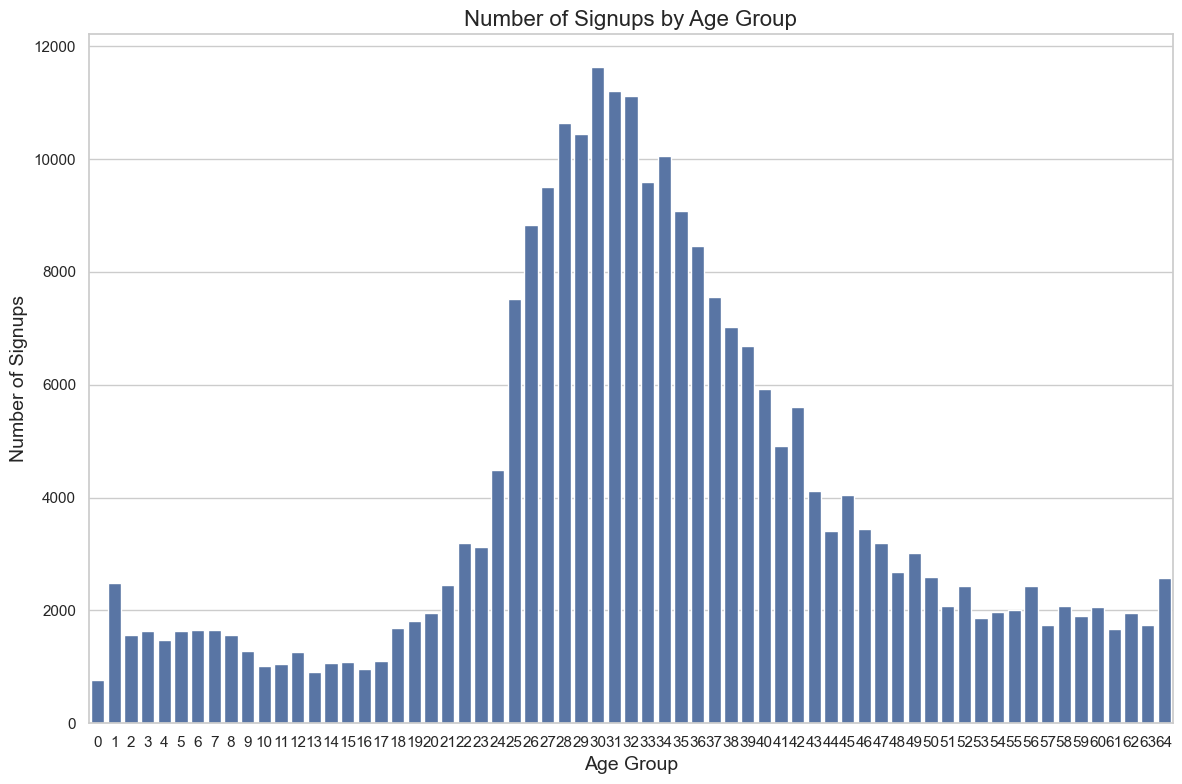

In [28]:
# age vs signups plot 
expanded_df['age'] = expanded_df['age'].astype(int)

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
age_group_counts = expanded_df['age'].value_counts().sort_index()
ax = sns.barplot(x=age_group_counts.index, y=age_group_counts.values)

plt.title('Number of Signups by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Signups', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [29]:
# creating age_groups 
def create_age_groups(df, interval=5):
    max_age = df['age'].max()
    bins = list(range(0, max_age + interval, interval))
    df['age_group'] = pd.cut(df['age'], bins=bins, right=False)
    return df

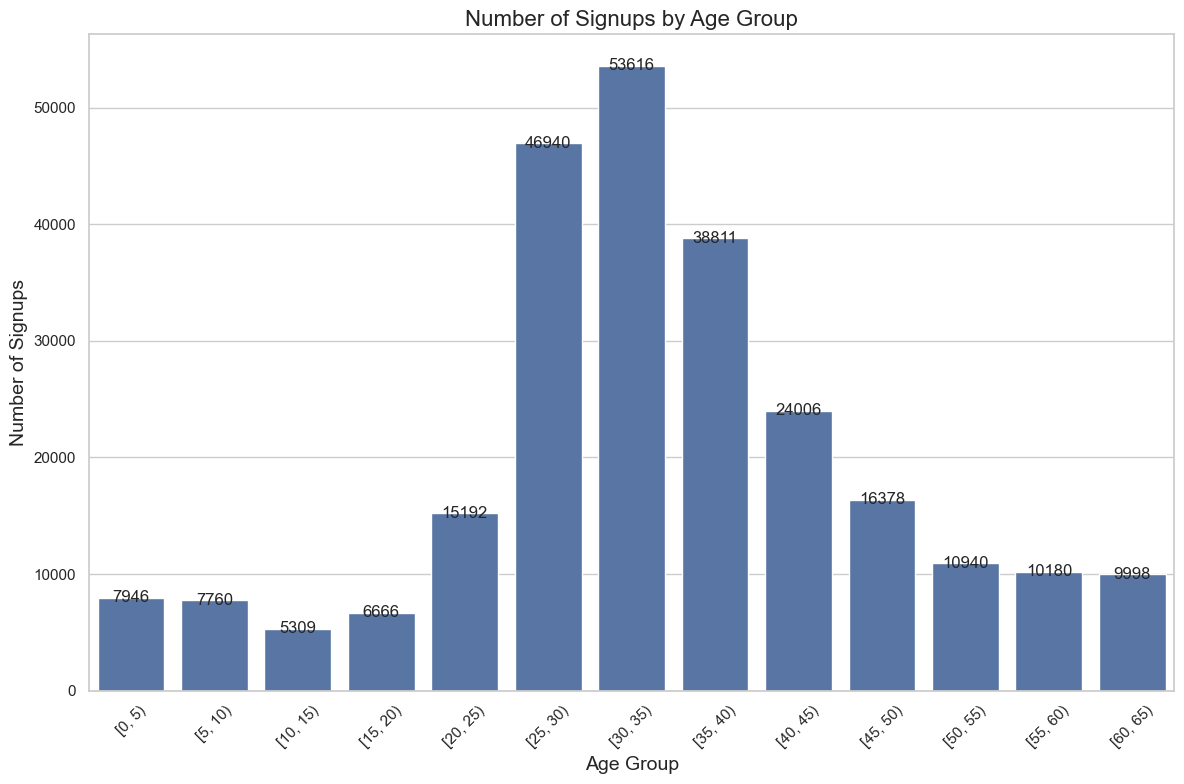

In [30]:
expanded_df = create_age_groups(expanded_df, interval=5)
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
age_group_counts = expanded_df['age_group'].value_counts().sort_index()
ax = sns.barplot(x=age_group_counts.index.astype(str), y=age_group_counts.values)

# adding total counts
for i, count in enumerate(age_group_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', va='center')

plt.title('Number of Signups by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Signups', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
grouped_data = expanded_df.groupby(['signup_month', 'paid']).size().unstack(fill_value=0)


In [32]:
grouped_data

paid,False,True
signup_month,,
April,16199,2991
February,3945,1385
January,2169,852
July,83583,33798
June,48943,17466
March,8354,1411
May,25788,6858


In [33]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August'] 

grouped_data = grouped_data.reindex(months_order)

In [34]:
grouped_data

paid,False,True
signup_month,,
January,2169.0,852.0
February,3945.0,1385.0
March,8354.0,1411.0
April,16199.0,2991.0
May,25788.0,6858.0
June,48943.0,17466.0
July,83583.0,33798.0
August,NaN,NaN


After playing around with the data a bit (please leave in a rough "Exploration" section showing how you did that :)), what do you think are 2 crucial data breakdowns or plots to be shown if you were presenting this data to the wider team? If you think multiple options are possible, feel free to say why you picked those 2.

Answer : I think there are more than 2 plot that can give important information, but the most important are possibly . 

1. Number of paid customers vs plan months and plan type :

Why: We can find which plans and durations are most popular. It can also help in understanding customer commitment levels, indicating whether users prefer short-term or long-term plans

2. Monthly revenue trend: 

Why : how revenue has changed over time can help identify growth patterns and seasonal trends.

the other important plots: 

3. Early bird signups and paid users : to figure out if the promotion was a success or not 
4. Plan Distribution by Gender : to understand the gender demographic of the customers 
5. No. of signups per-month(paid vs unpain) : Signup trends to find suitable window for promotions 


 


# Number of paid customers vs plan months and plan type 

Insights : 
1. Most paying customers prefer the 3 or 12 months plans over the 6 month 
2. LITE plan for 12 months in the most popular 
3. All the three categories in months have a similar distribution i.e. more customers prefer LITE plan to the PLUS plan 
4. It also shows the commitment of customers 


In [35]:
# flter the dataframe to include only paid customers
paid_df = expanded_df[expanded_df['paid']]

grouped_plan_months = paid_df.groupby(['plan_months', 'plan']).size().unstack(fill_value=0)

In [36]:
grouped_plan_months

plan,LITE,PLUS
plan_months,,
3,4933,14618
6,882,2585
12,10575,31168


<Figure size 1200x800 with 0 Axes>

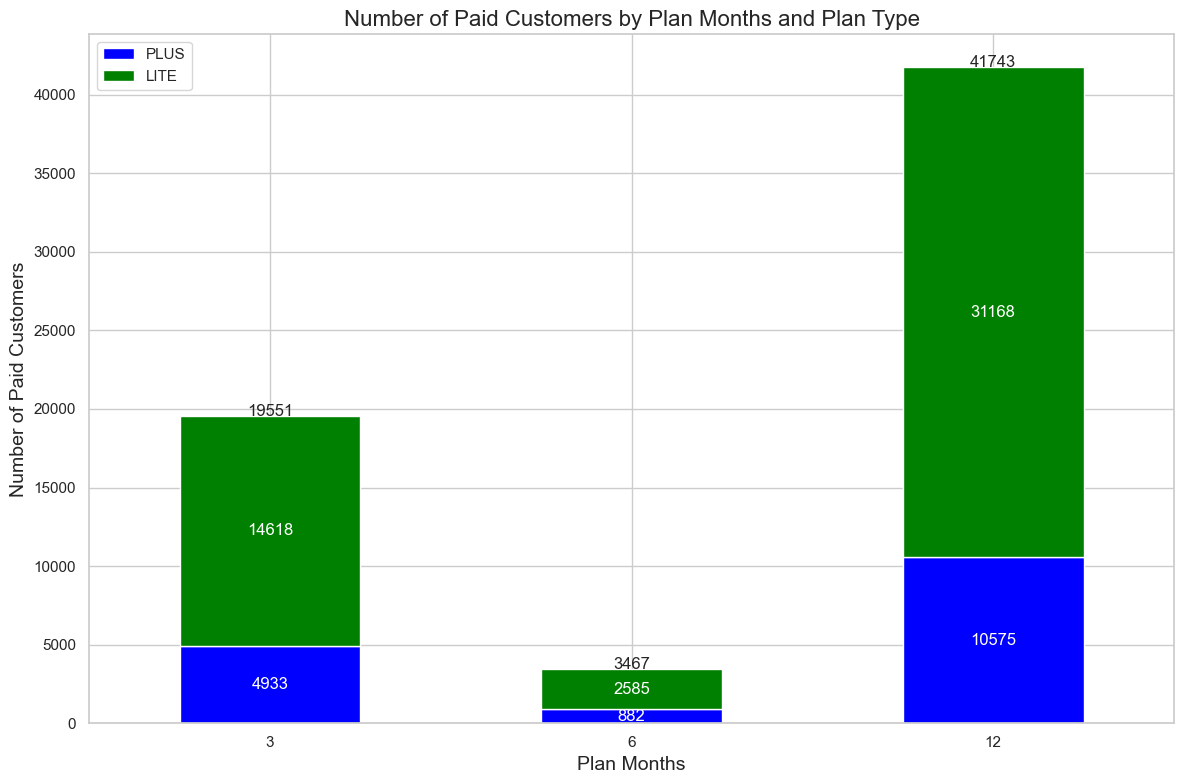

In [37]:

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax = grouped_plan_months.plot(kind='bar', stacked=True, color=['blue', 'green'], figsize=(12, 8))

# total counts above the bars
totals = grouped_plan_months.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(i, total + 1, str(total), ha='center')

# counts for each plan type inside the bars
for i, (plus, lite) in enumerate(grouped_plan_months.values):
    ax.text(i, plus / 2, str(plus), ha='center', va='center', color='white')
    ax.text(i, plus + (lite / 2), str(lite), ha='center', va='center', color='white')

legend_labels = ['PLUS', 'LITE']
plt.legend(legend_labels)

plt.title('Number of Paid Customers by Plan Months and Plan Type', fontsize=16)
plt.xlabel('Plan Months', fontsize=14)
plt.ylabel('Number of Paid Customers', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2.Monthly revenue trend

Insights: 
1. Revenue trends across the year 
2. Which months were the most profitable - June, july 
3. Is it directly co-related to no. of signups( will have to use signups vs months plot to compare)
4. Effectivness of the early_bird signups (will have to use )


In [38]:
from matplotlib.ticker import FuncFormatter

In [39]:
expanded_df['payment_month'] = expanded_df['payment_time'].dt.strftime('%B')
df_cleaned = expanded_df.dropna(subset=['payment_time'])
df_cleaned.columns

monthly_revenue = df_cleaned.groupby('payment_month')['payment_amount'].sum()

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue = monthly_revenue.reindex(months_order)

In [40]:
monthly_revenue

payment_month
January        7723441.0
February      14119189.0
March         22565046.0
April         40478010.0
May           94177157.0
June         234381502.0
July         460490856.0
August        96930532.0
September     30040832.0
October       10853971.0
November        814166.0
December             NaN
Name: payment_amount, dtype: float64

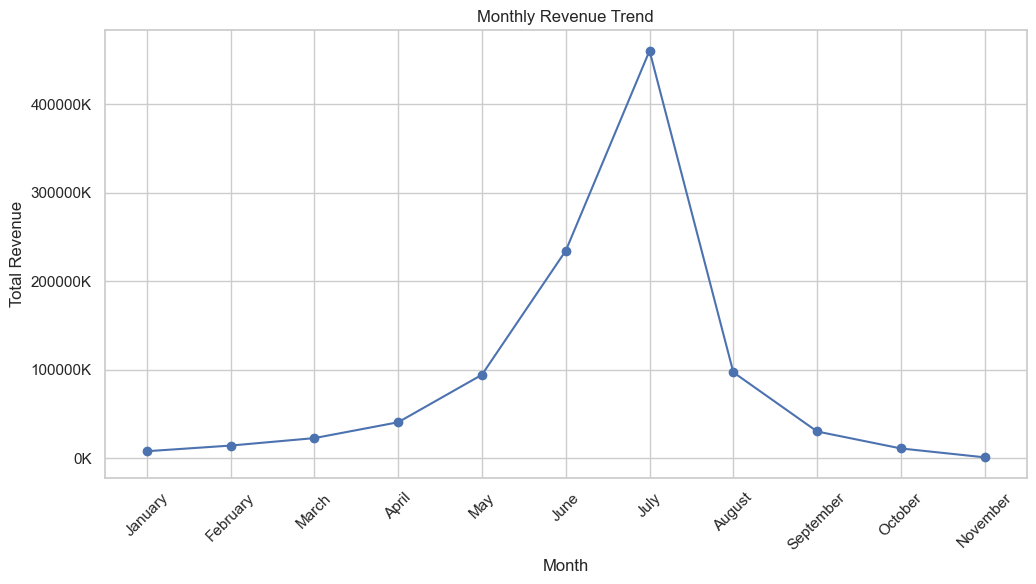

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


# the sum values become too big so converting the values to thousands 
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)


formatter = FuncFormatter(thousands)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

# 2.1 early_bird signups and regular_signups vs months
# 2.2 early_bird signups vs months

In [42]:
regular_signups = expanded_df[expanded_df['is_early_bird']== False]

regular_signups_counts = regular_signups.groupby('signup_month').size()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
regular_signups_counts = regular_signups_counts.reindex(months_order, fill_value=0)

early_bird_df = expanded_df[expanded_df['is_early_bird']]

# group by signup_month
early_bird_counts = early_bird_df.groupby('signup_month').size()

# indexing and ordering the months 
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
early_bird_counts = early_bird_counts.reindex(months_order, fill_value=0)

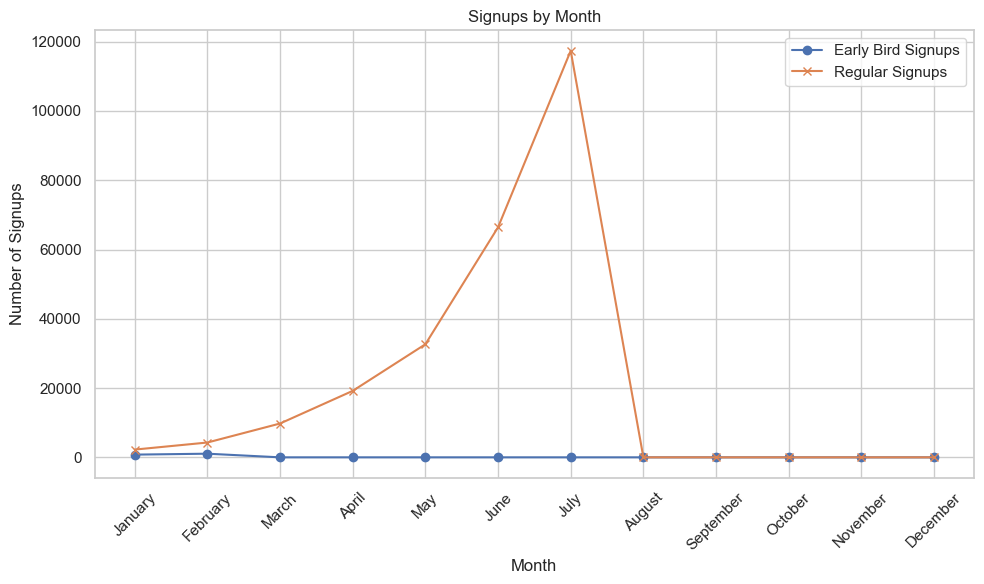

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(early_bird_counts.index, early_bird_counts.values, marker='o', linestyle='-', label='Early Bird Signups')
plt.plot(regular_signups_counts.index, regular_signups_counts.values, marker='x', linestyle='-', label='Regular Signups')
plt.title('Signups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

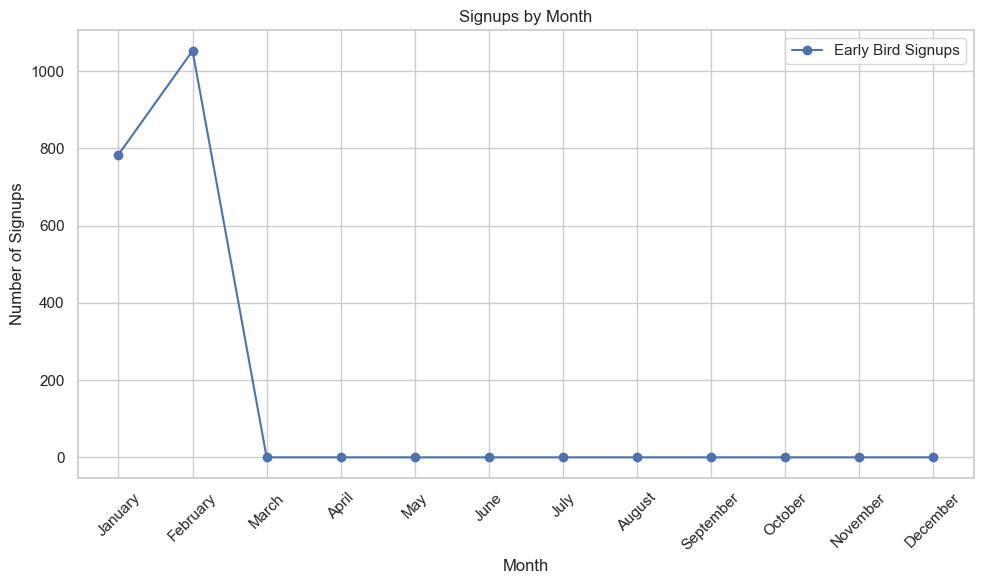

In [44]:

plt.figure(figsize=(10, 6))
plt.plot(early_bird_counts.index, early_bird_counts.values, marker='o', linestyle='-', label='Early Bird Signups')
plt.title('Signups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



#  Early bird signups and paid users

Insight:
1. All early_bird_signups are paid customers
 

In [45]:
# filter data for is_early_birs == true
early_bird_true = expanded_df[expanded_df['is_early_bird'] == True]
grouped_early_bird_true = early_bird_true['paid'].value_counts().sort_index()

# filter data for is_early_birs == false)
early_bird_false = expanded_df[expanded_df['is_early_bird'] == False]
grouped_early_bird_false = early_bird_false['paid'].value_counts().sort_index()

C:\Users\nisha\AppData\Local\Temp\ipykernel_12404\3303072962.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_early_bird_true.index, y=grouped_early_bird_true.values, palette=['#1f77b4', '#ff7f0e'])
C:\Users\nisha\AppData\Local\Temp\ipykernel_12404\3303072962.py:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x=grouped_early_bird_true.index, y=grouped_early_bird_true.values, palette=['#1f77b4', '#ff7f0e'])
C:\Users\nisha\AppData\Local\Temp\ipykernel_12404\3303072962.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_early_bird_false.index, y=grouped_early_bird_false.values, palette=['#1f77b4', '#ff7f0e'

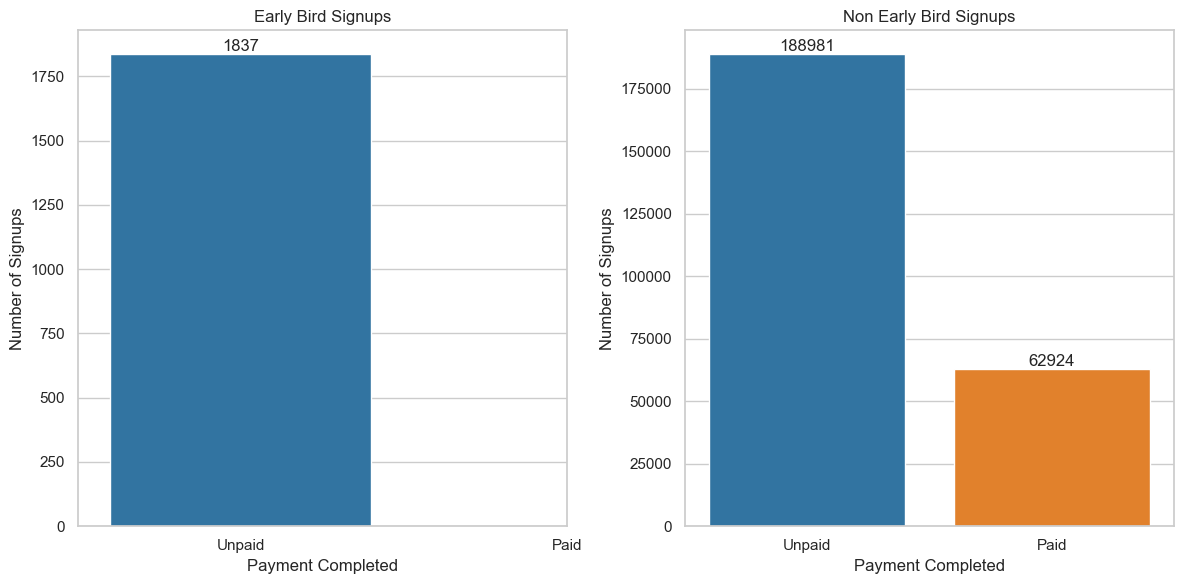

In [46]:
#palette=['#1f77b4', '#ff7f0e']
#palette=['#1f77b4', '#ff7f0e']
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=grouped_early_bird_true.index, y=grouped_early_bird_true.values, palette=['#1f77b4', '#ff7f0e'])
plt.title('Early Bird Signups')
plt.xlabel('Payment Completed')
plt.ylabel('Number of Signups')
plt.xticks([0, 1], ['Unpaid', 'Paid'])

for index, value in enumerate(grouped_early_bird_true.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.subplot(1, 2, 2)
sns.barplot(x=grouped_early_bird_false.index, y=grouped_early_bird_false.values, palette=['#1f77b4', '#ff7f0e'])
plt.title('Non Early Bird Signups')
plt.xlabel('Payment Completed')
plt.ylabel('Number of Signups')
plt.xticks([0, 1], ['Unpaid', 'Paid'])

for index, value in enumerate(grouped_early_bird_false.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Plan Distribution by Gender

<Figure size 1000x600 with 0 Axes>

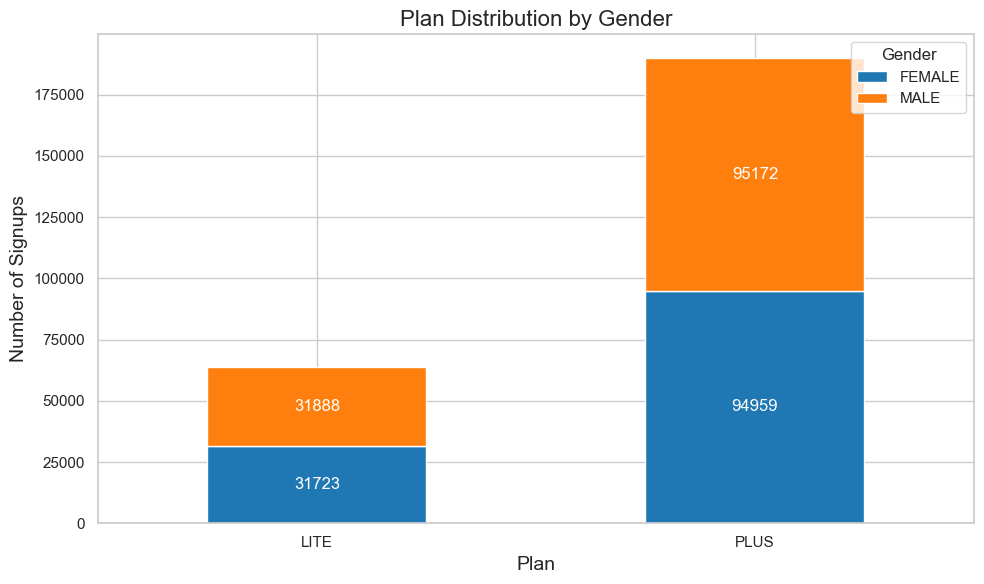

In [50]:
grouped_plan_gender = expanded_df.groupby(['plan', 'gender']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

grouped_plan_gender.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(10, 6))

for i, (plan, counts) in enumerate(grouped_plan_gender.iterrows()):
    bottom = 0
    for gender, count in counts.items():
        if count > 0:
            plt.text(i, bottom + count / 2, int(count), ha='center', va='center', color='white', fontsize=12)
        bottom += count


plt.title('Plan Distribution by Gender', fontsize=16)
plt.xlabel('Plan', fontsize=14)
plt.ylabel('Number of Signups', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()

C:\Users\nisha\AppData\Local\Temp\ipykernel_12404\86264386.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender', loc='upper right')


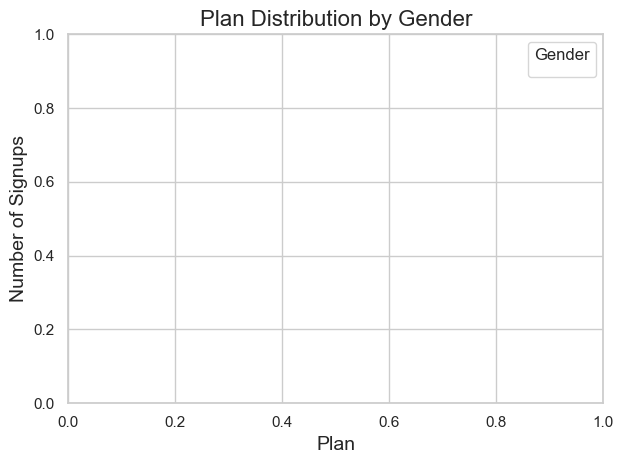

In [48]:
plt.title('Plan Distribution by Gender', fontsize=16)
plt.xlabel('Plan', fontsize=14)
plt.ylabel('Number of Signups', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()

# No. of signups per-month(paid vs unpain)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


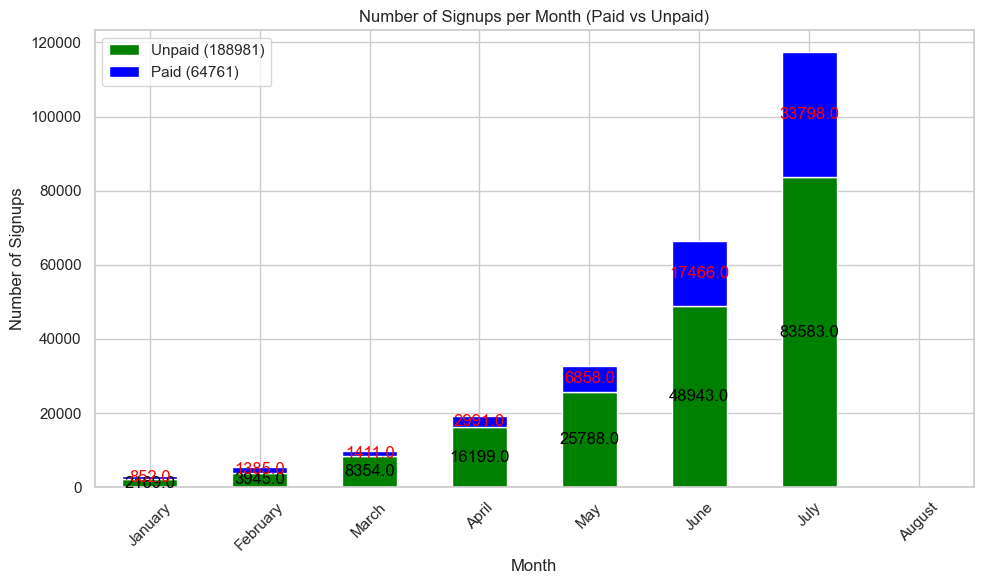

In [51]:
grouped_df_months = expanded_df.groupby(['signup_month', 'paid']).size().unstack(fill_value=0)
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August'] 
grouped_df_months = grouped_df_months.reindex(months_order)

total_paid = expanded_df['paid'].sum()
total_unpaid = len(expanded_df) - total_paid

ax = grouped_df_months.plot(kind='bar', stacked=True, color=['green', 'blue'], figsize=(10, 6))

for i, (unpaid, paid) in enumerate(grouped_df_months.values):
    ax.text(i, unpaid / 2, str(unpaid), ha='center', va='center', color='black')
    ax.text(i, unpaid + (paid / 2), str(paid), ha='center', va='center', color='red')

plt.title('Number of Signups per Month (Paid vs Unpaid)')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
legend_labels = [f'Unpaid ({total_unpaid})', f'Paid ({total_paid})']
plt.legend(legend_labels)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Consider the fields `signup_time` and `payment_time`. They stand for the time a given user (who then may add multiple family members) signed up and then paid, respectively. In a single plot, how can you best show the distribution of time "deltas" between the sign up time and payment time (i.e. how long it takes for people to pay once they have signed up)? What is the best way to condense the relevant information and insights? Remember it needs to be a single, static plot, which ideally should not need to be magnified to make sense.


Answer:
Plotting the time_delta vs frequency plot , it was clearly a very skewed graph. To make it readable we can you use log plot 

In [52]:
paid_signups = expanded_df[expanded_df['paid']==True]
paid_signups.shape


(64761, 13)

In [53]:
paid_signups.loc[:, 'time_delta'] = (paid_signups['payment_time'] - paid_signups['signup_time']).dt.total_seconds() / 3600  # convert to hours


C:\Users\nisha\AppData\Local\Temp\ipykernel_12404\3042127777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_signups.loc[:, 'time_delta'] = (paid_signups['payment_time'] - paid_signups['signup_time']).dt.total_seconds() / 3600  # convert to hours


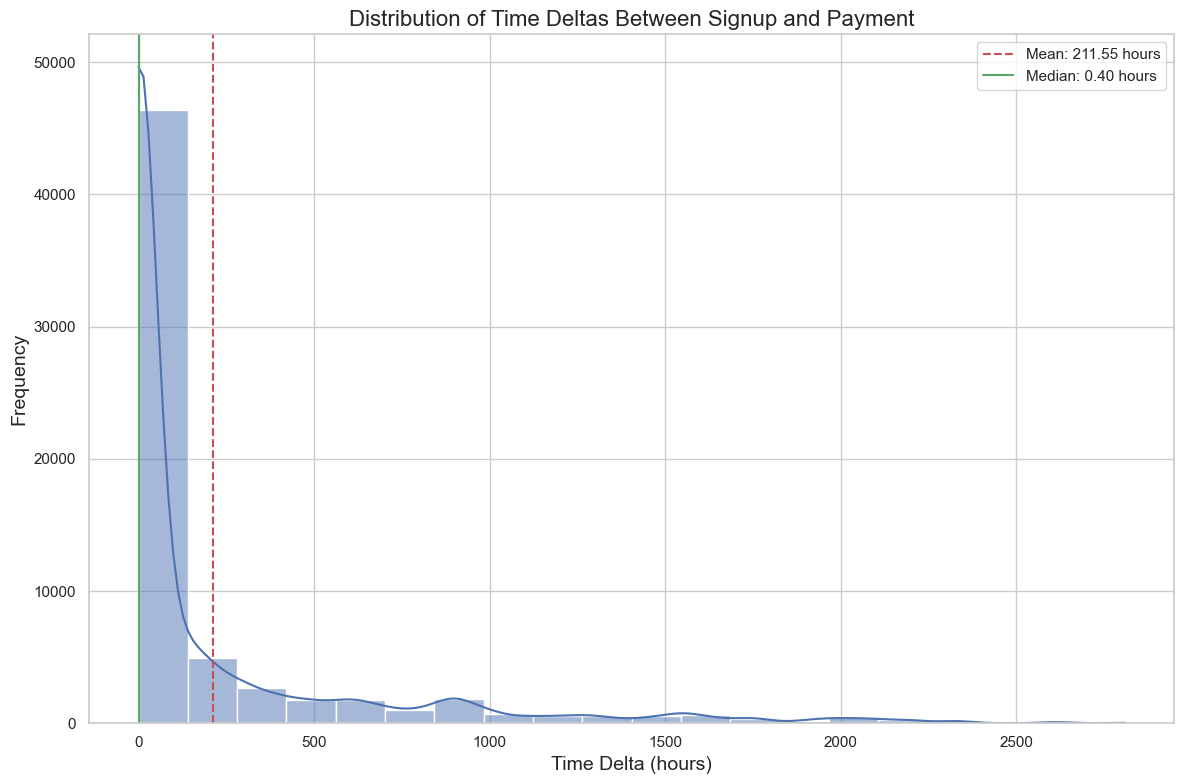

Mean time delta: 211.55 hours
Median time delta: 0.40 hours


In [54]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax = sns.histplot(paid_signups['time_delta'], bins=20, kde=True)

filtered_df = paid_signups.dropna(subset=['time_delta'])
filtered_df = filtered_df[filtered_df['time_delta'] > 0]


mean_delta = filtered_df['time_delta'].mean()
median_delta = filtered_df['time_delta'].median()
plt.axvline(mean_delta, color='r', linestyle='--', label=f'Mean: {mean_delta:.2f} hours')
plt.axvline(median_delta, color='g', linestyle='-', label=f'Median: {median_delta:.2f} hours')
plt.title('Distribution of Time Deltas Between Signup and Payment', fontsize=16)
plt.xlabel('Time Delta (hours)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

print(f'Mean time delta: {mean_delta:.2f} hours')
print(f'Median time delta: {median_delta:.2f} hours')

In [54]:
filtered_df.shape

(64761, 14)

The above graph is right skewed. To better visualise it we can use log-plot

In [57]:
filtered_df.columns

Index(['signup_time', 'age', 'gender', 'plan', 'plan_months', 'payment_time',
       'is_early_bird', 'payment_amount', 'ID', 'signup_month', 'paid',
       'age_group', 'payment_month', 'time_delta'],
      dtype='object')

In [55]:
import numpy as np 

In [60]:
# using log plot for better representation 

filtered_df['log_time_delta'] = np.log1p(filtered_df['time_delta'])  # log1p is used to avoid log(0) issue


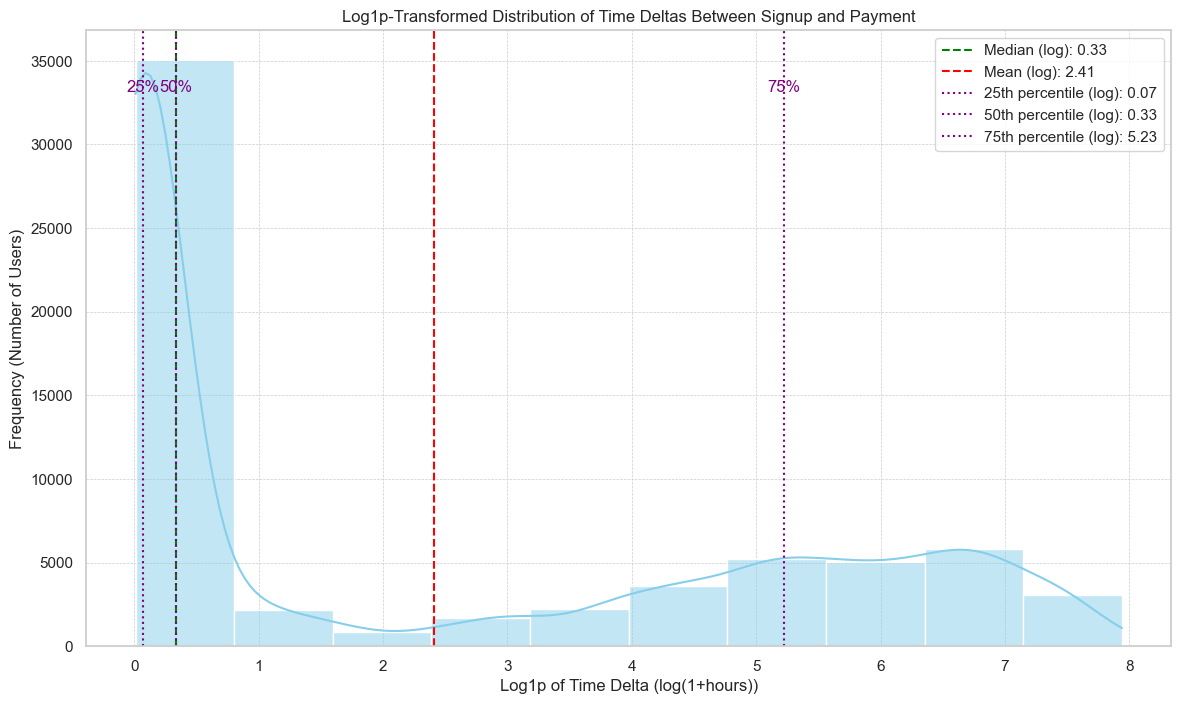

In [61]:
# Plotting the histogram with log-transformed data
plt.figure(figsize=(14, 8))
sns.histplot(filtered_df['log_time_delta'], bins=10, kde=True, color='skyblue')


median = filtered_df['log_time_delta'].median()
mean = filtered_df['log_time_delta'].mean()

# Add median line
plt.axvline(median, color='green', linestyle='--', label=f'Median (log): {median:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Mean (log): {mean:.2f}')

# Add annotations for key percentiles
percentiles = [25, 50, 75]
for percentile in percentiles:
    value = np.percentile(filtered_df['log_time_delta'], percentile)
    plt.axvline(value, color='purple', linestyle=':', label=f'{percentile}th percentile (log): {value:.2f}')
    plt.text(value, plt.ylim()[1] * 0.9, f'{percentile}%', color='purple', ha='center')

plt.title('Log1p-Transformed Distribution of Time Deltas Between Signup and Payment')
plt.xlabel('Log1p of Time Delta (log(1+hours))')
plt.ylabel('Frequency (Number of Users)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

3. You are given the payment amounts but you don't know what the underlying price function is, and what its inputs are (though you can assume they are a subset of the given fields). If you had to treat this as a prediction problem, what kind of model would you use? **PLEASE DO NOT ACTUALLY ATTEMPT MODELLING**. Base your answer on any data exploration you did (and feel free to show plots/stats), but what we are looking is simply a discussion of what may be some of the modelling challenges here and how to pick a model which can overcome them.


In [62]:
filtered_df.columns


Index(['signup_time', 'age', 'gender', 'plan', 'plan_months', 'payment_time',
       'is_early_bird', 'payment_amount', 'ID', 'signup_month', 'paid',
       'age_group', 'payment_month', 'time_delta', 'log_time_delta'],
      dtype='object')

<Figure size 2000x1000 with 0 Axes>

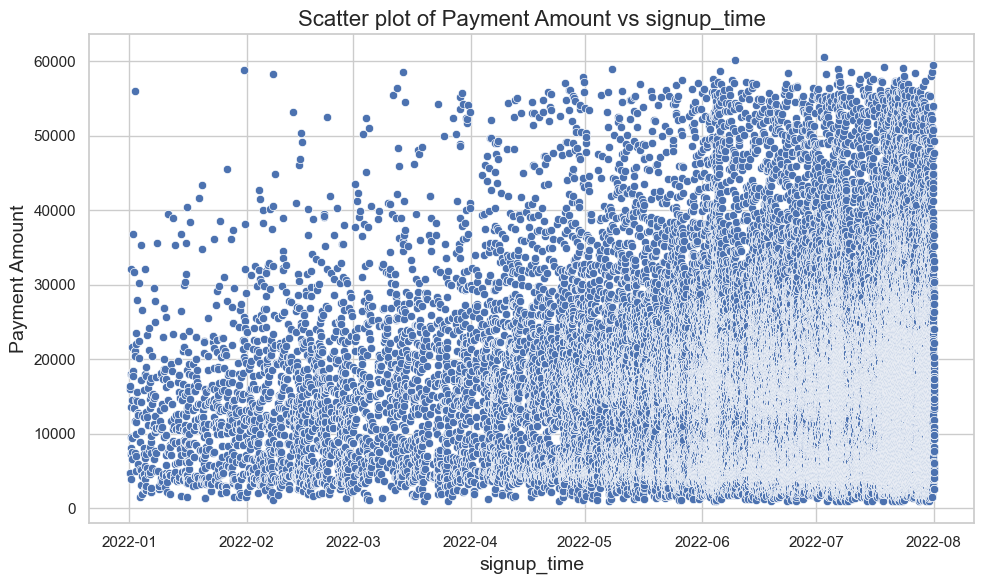

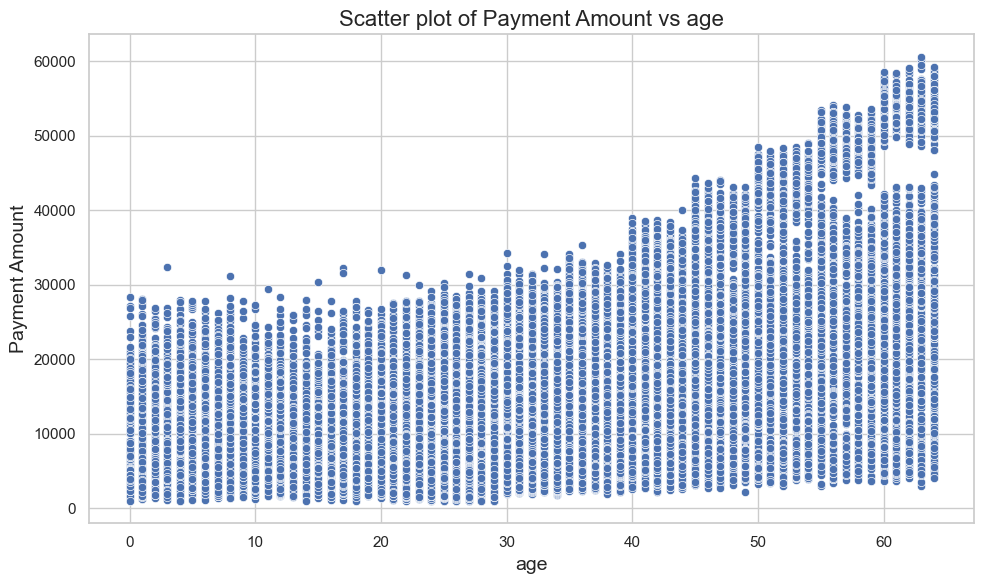

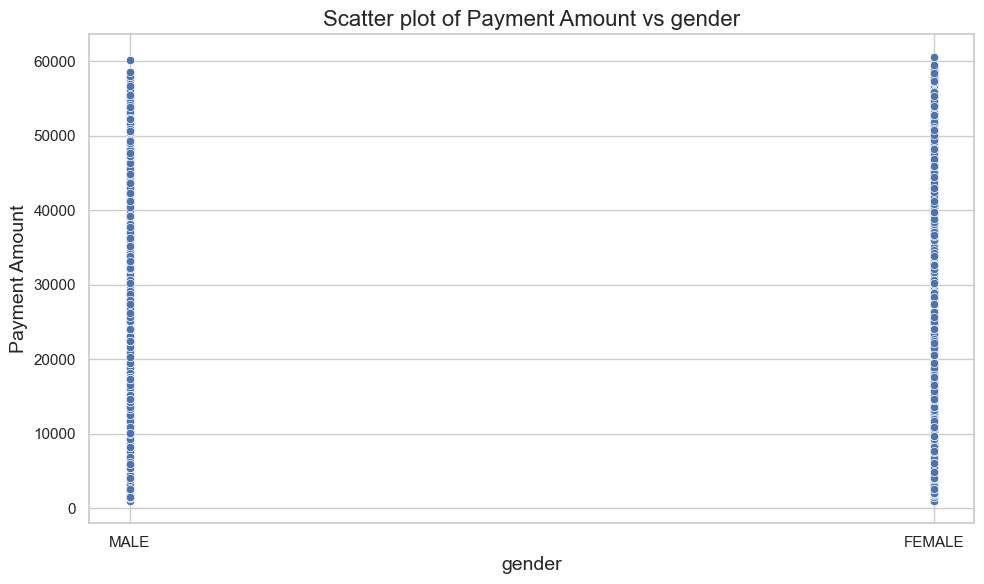

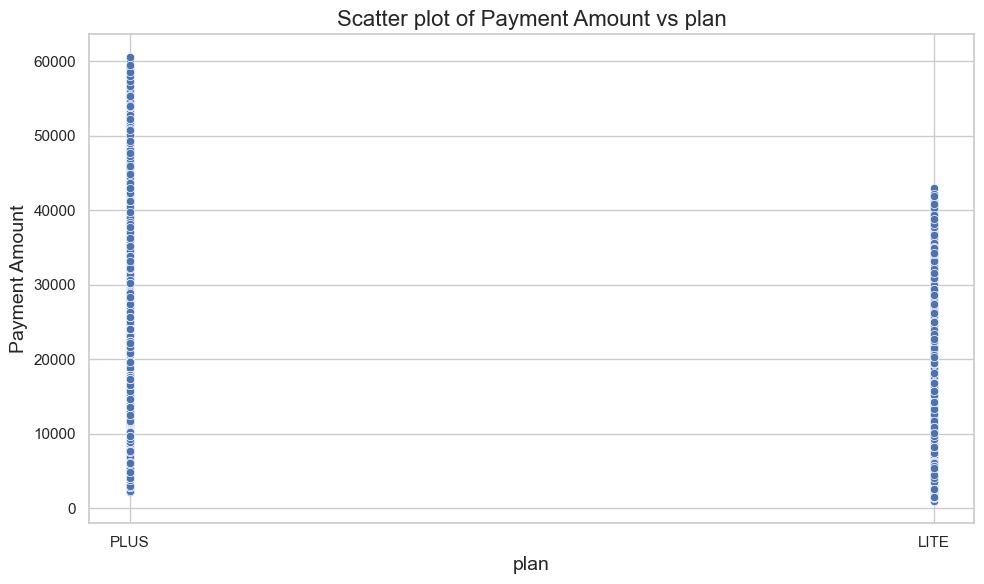

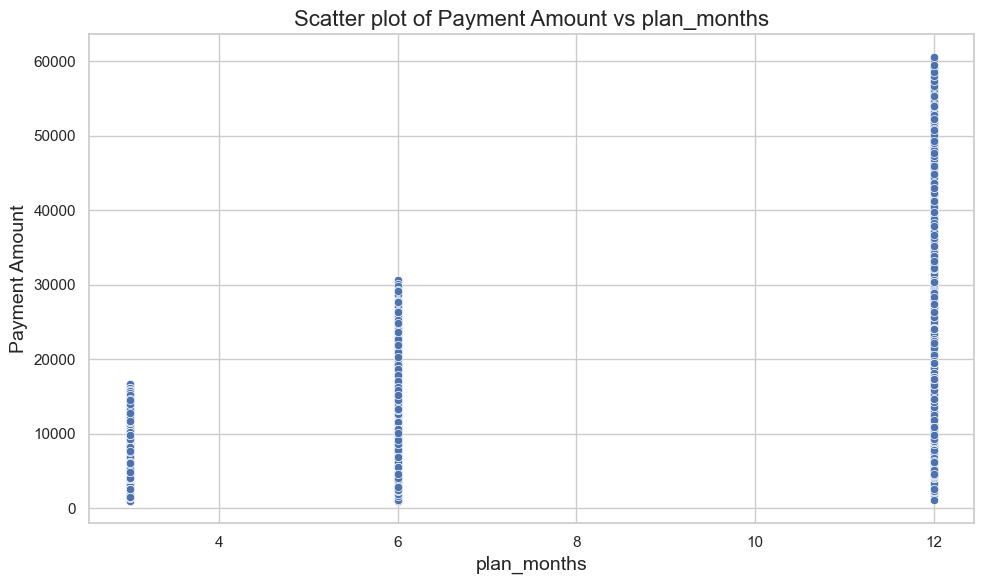

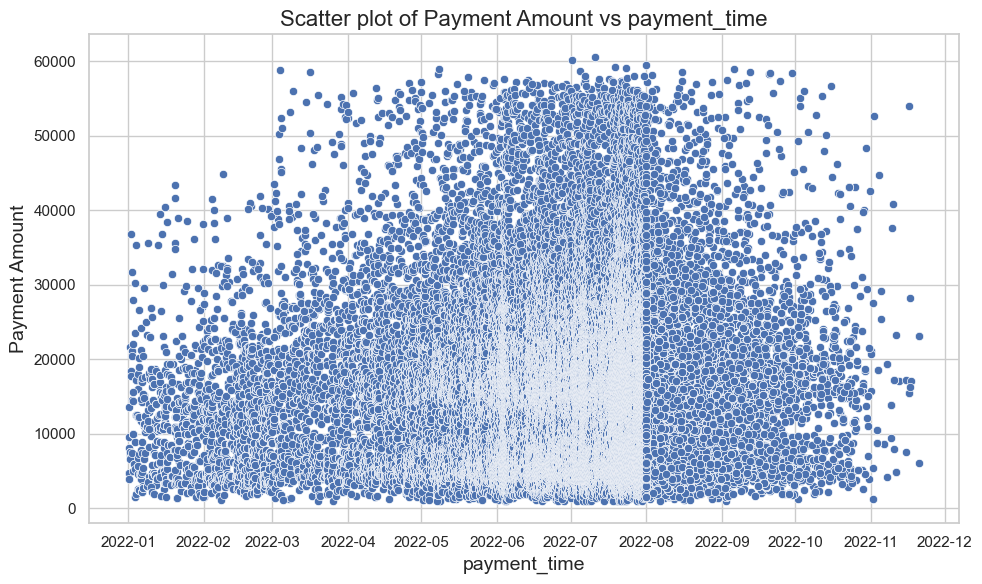

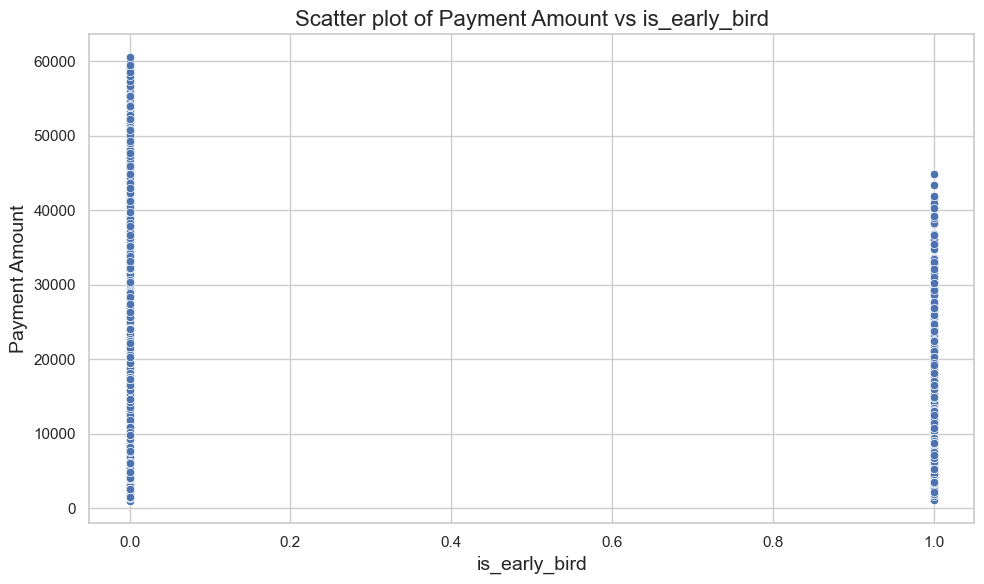

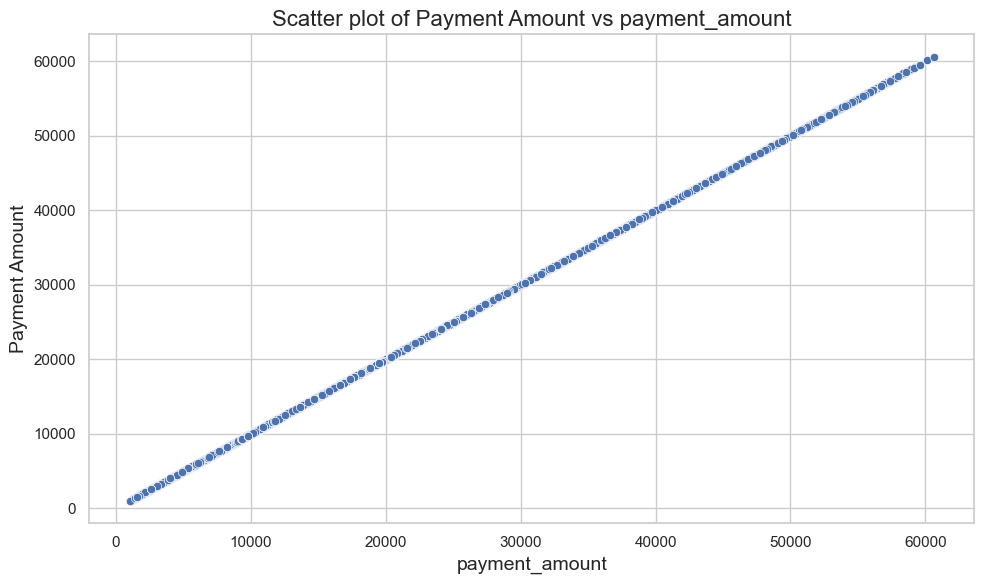

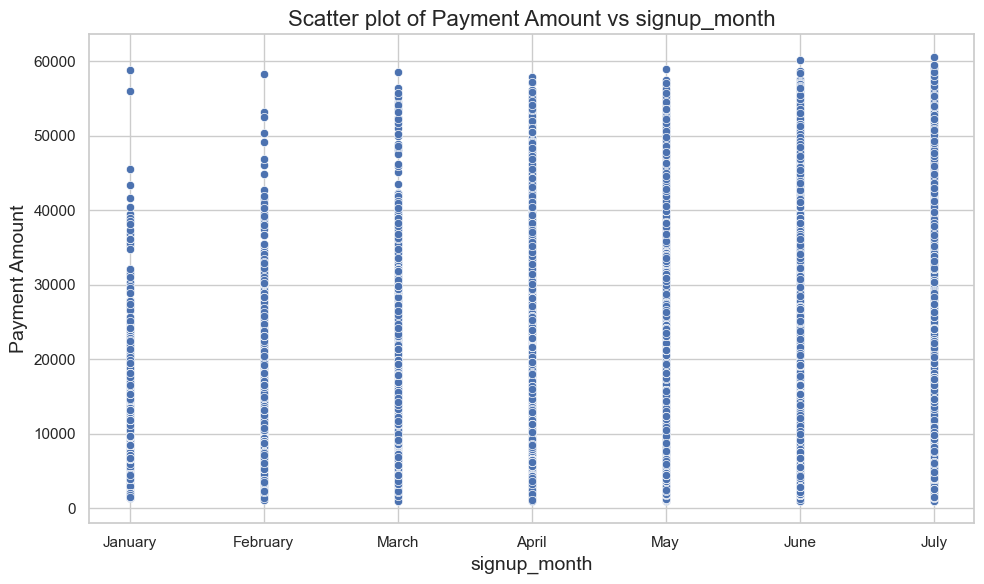

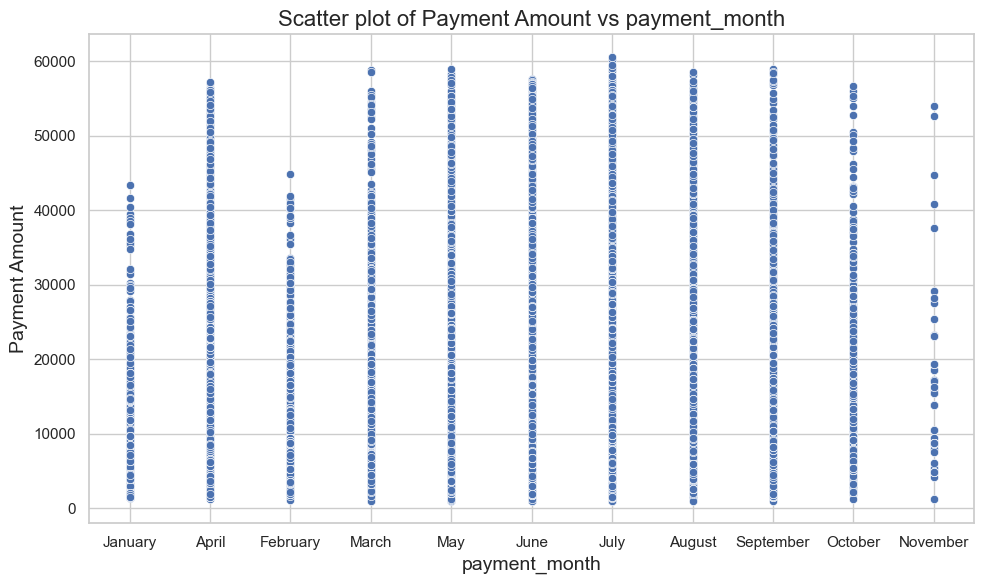

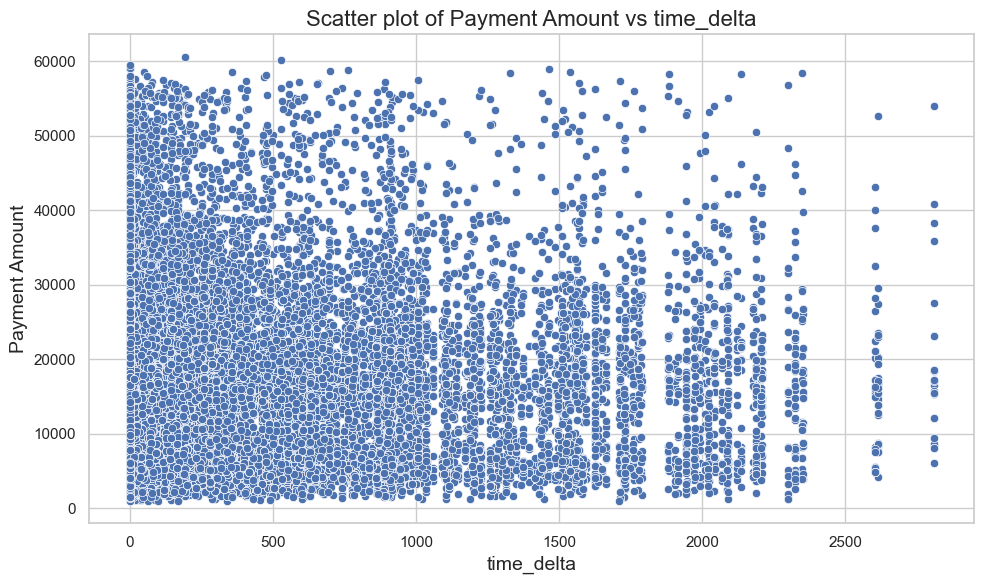

In [63]:
# trying to understant the nature/distribution of payment_amount with other features 

features = ['signup_time', 'age', 'gender', 'plan', 'plan_months', 'payment_time',
       'is_early_bird', 'payment_amount', 'signup_month',
       'payment_month', 'time_delta']

sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))

for i, feature in enumerate(features):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_df, x=feature, y='payment_amount')
    plt.title(f'Scatter plot of Payment Amount vs {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Payment Amount', fontsize=14)
    plt.tight_layout()
    plt.show()

# Alot of the scatter plots are not that helpful, but we do find out that none of the individual features are strictly linearly correlated to payment_amount


In [64]:
# finding exact coorelation b/w payment_amount and the features itself 


filtered_df.columns

Index(['signup_time', 'age', 'gender', 'plan', 'plan_months', 'payment_time',
       'is_early_bird', 'payment_amount', 'ID', 'signup_month', 'paid',
       'age_group', 'payment_month', 'time_delta', 'log_time_delta'],
      dtype='object')

In [72]:
correlation_df = filtered_df.drop(columns=['signup_time','age','ID','paid','payment_month','signup_month','payment_time','log_time_delta','age_group'])

In [73]:
correlation_df.dtypes

gender             object
plan               object
plan_months         int64
is_early_bird        bool
payment_amount    float64
time_delta        float64
dtype: object

In [76]:
correlation_df['is_early_bird'] = correlation_df['is_early_bird'].astype(int)

correlation_df_encode = pd.get_dummies(correlation_df,columns=['gender','plan'])

In [75]:
# finding coorelation b/w features and payment_amount
filtered_df.columns
corr_df = filtered_df.drop(columns=['signup_time','age','payment_time','ID','signup_month','payment_month','paid','log_time_delta'])
corr_df = corr_df[corr_df['payment_amount']>0]

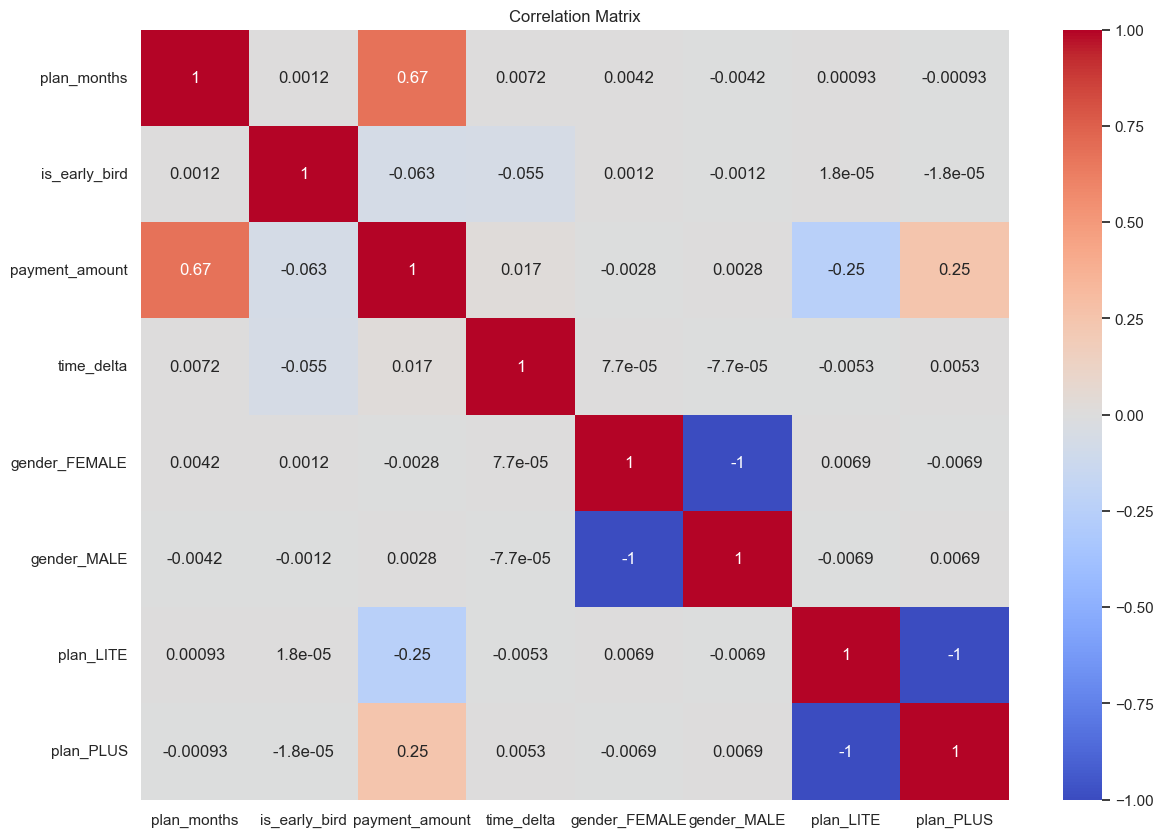

In [77]:
crr_matrix= correlation_df_encode.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(crr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the plot we can see that the input features are not correlated to each other, they are indenpedent and can be used for modeling 

In [78]:
correlation_results = correlation_df_encode.corr()['payment_amount']
print("Correlation with encoded columns:")
print(correlation_results)

Correlation with encoded columns:
plan_months       0.674603
is_early_bird    -0.063341
payment_amount    1.000000
time_delta        0.017001
gender_FEMALE    -0.002789
gender_MALE       0.002789
plan_LITE        -0.248029
plan_PLUS         0.248029
Name: payment_amount, dtype: float64


# Analysis 
these numbers indicate the strength and direction of the linear relationship between the payment_amount and other features. 

plan_months : a string +ve correlation 

is_early_bird :very  weak -ve correlation 

time_delta : very  weak +ve correlation

gender_FEMALE : very  weak -ve correlation

gender_MALE : very  weak +ve correlation

plan_LITE  : moderate -ve correlation 

plan_PLUS  : moderate +ve correlation 

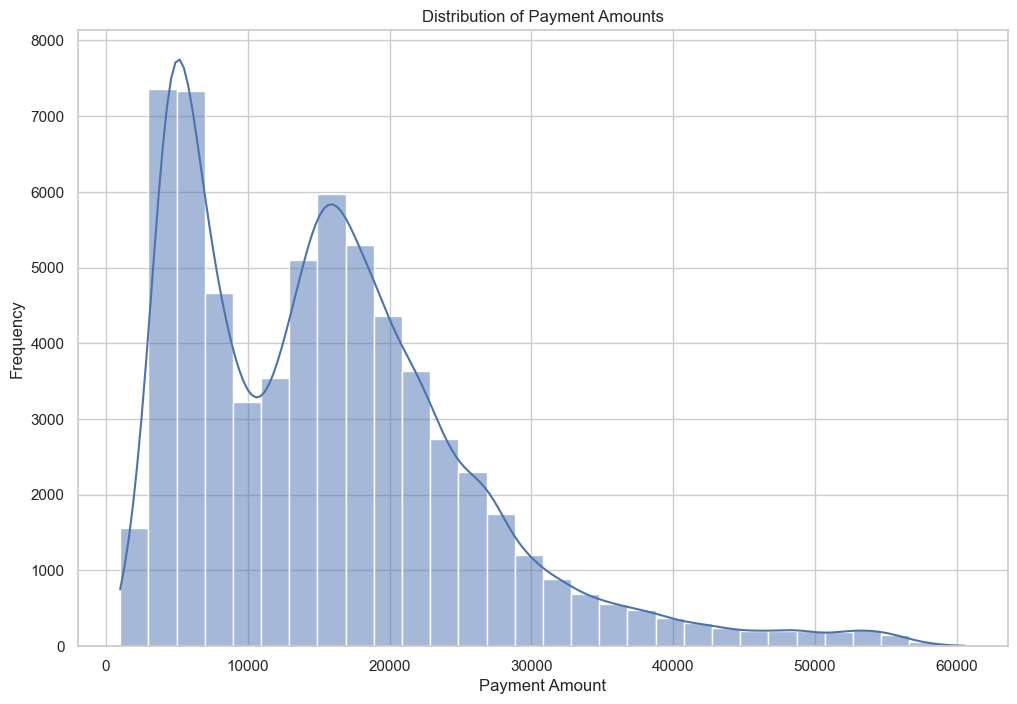

In [79]:
# distribution of payment_amount
# to understand the nature.distribution of payment_amount

# the data is higly skewed and has a lot of outliers 

plt.figure(figsize=(12, 8))  # Set standard plot size
sns.histplot(corr_df['payment_amount'], bins=30, kde=True)
plt.title('Distribution of Payment Amounts')
plt.xlabel('Payment Amount')
plt.ylabel('Frequency')
plt.show()

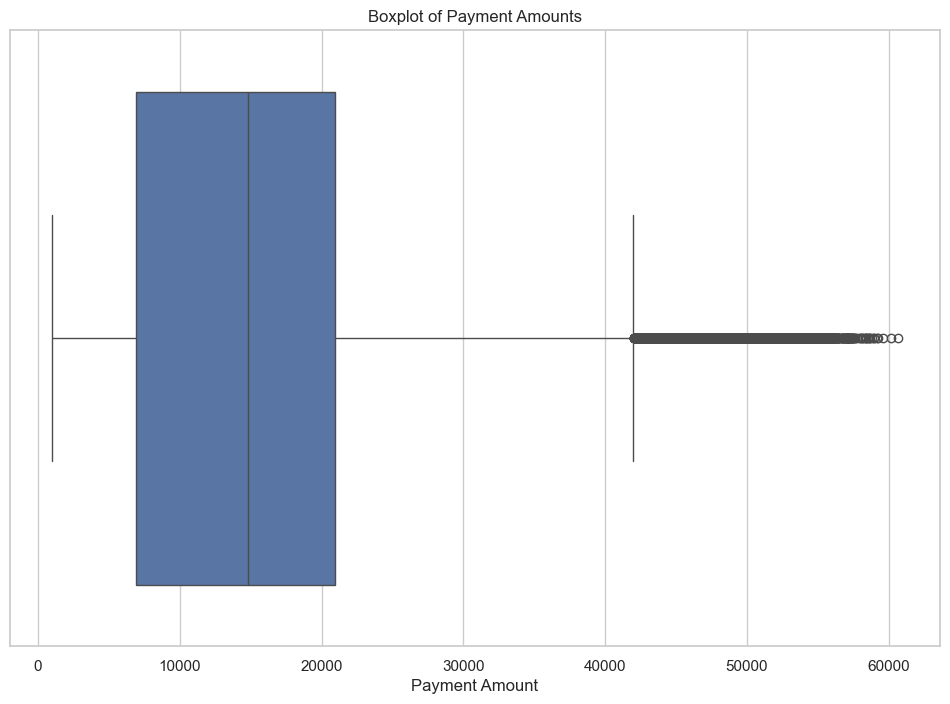

In [80]:
# box_plot to show outliers 
plt.figure(figsize=(12, 8))
sns.boxplot(x=corr_df['payment_amount'])
plt.title('Boxplot of Payment Amounts')
plt.xlabel('Payment Amount')
plt.show()

# Modelling challanges

1. Using correlation analysis identifying and selecting relevant features can be challenging but is crucial for model performance.Also, checking the coorelation between the features to identify highly coorelated features
2. Data distribution and outliers : The data is highly right skewed and has a lot of outliers 
3. Non-linear relationshipl between features and payment_amount. 


# Which model to use ? 

Well considering the above challanges , RandomForest or  XGBoost seem the right choice to handle the non-linearity and outliers in the dataset